In [196]:
from scipy import fftpack
import numpy as np
import pylab as P
import radialProfile
 
def powerSpecturm(data):
    
    image = np.byte(255 * (data - data.min()) / (data.max() - data.min()))
    image = data
# Take the fourier transform of the image.
    F1 = fftpack.fft2(image)
 
# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )
 
# Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2
 
# Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(psd2D)
    
    return psd1D
 
#

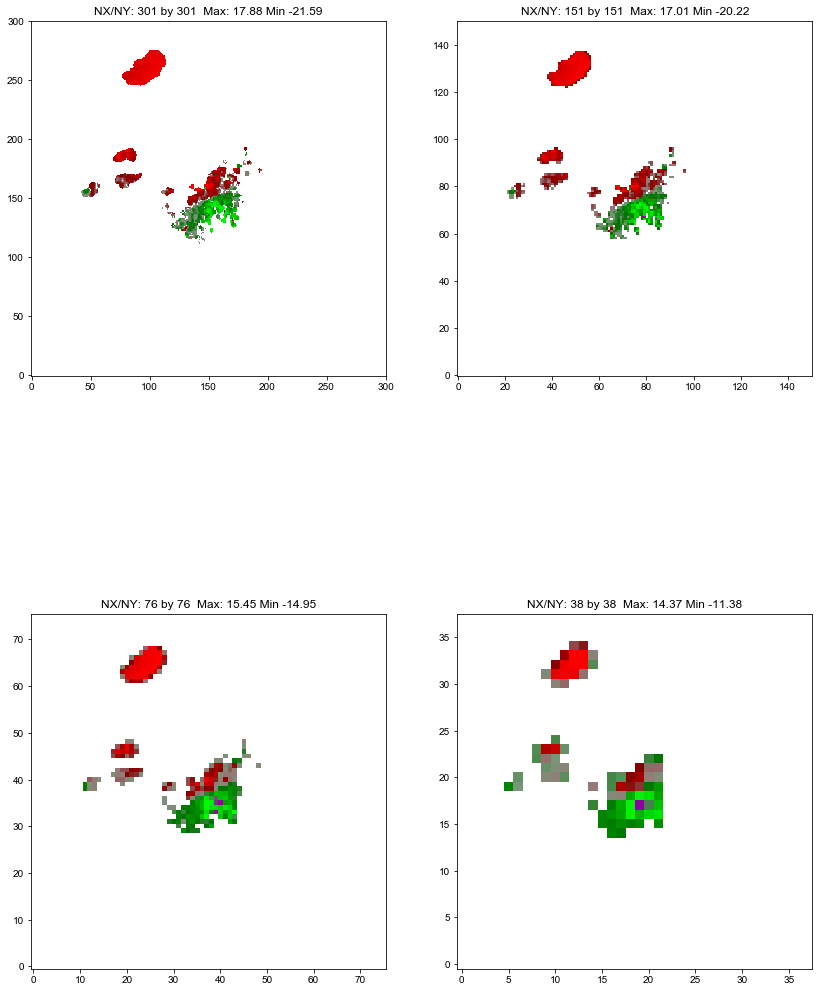

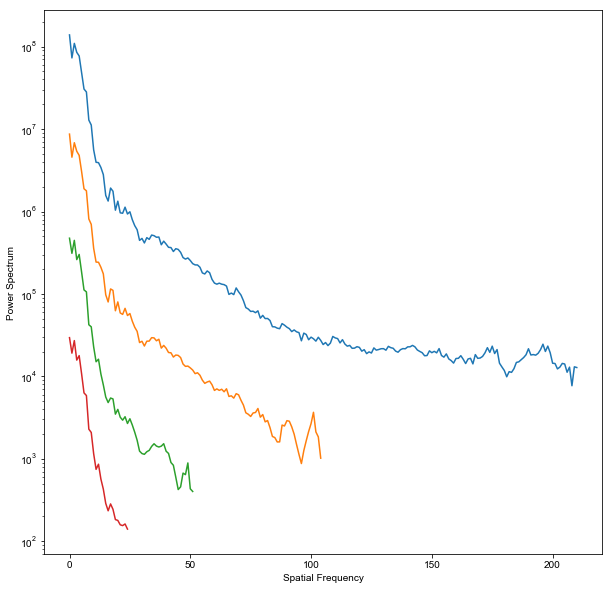

In [220]:
import pylab as P
from pyart.graph import cm

_method = 'db1'

filename = "obs_seq_KFDR_20170516_230237.nc"

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_1km/"+filename)
data = (im.variables['VEL'][0]).filled(0.0)

arr = data
psd1D = []
# arr = np.pad(arr, (90, 89), 'reflect')
# print arr.shape

P.figure(figsize = (14,20))

ax = P.subplot(221)
P.imshow(np.ma.masked_array(data, np.abs(data) < 0.5), origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (data.shape[0], data.shape[1], data.max(), data.min()))
psd1D.append(powerSpecturm(data))

saveWave = []

for n in np.arange(3):
    coeffs = pywt.dwt2(arr, _method)
    cA, (cH, cV, cD) = coeffs
    dd = (cA/(2**(n+1)))
    psd1D.append(powerSpecturm(dd))
    ax = P.subplot(222+n)
    P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
    P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))
#     ax = P.subplot(424+n)
#     P.semilogy( psf1D )
#     P.xlabel('Spatial Frequency')
#     P.ylabel('Power Spectrum')

    saveWave.append(dd)
    arr = cA
    
    
P.show()

P.figure(figsize = (10,10))
for n in np.arange(4):
    P.semilogy( psd1D[n] )
P.xlabel('Spatial Frequency')
P.ylabel('Power Spectrum')
P.show()

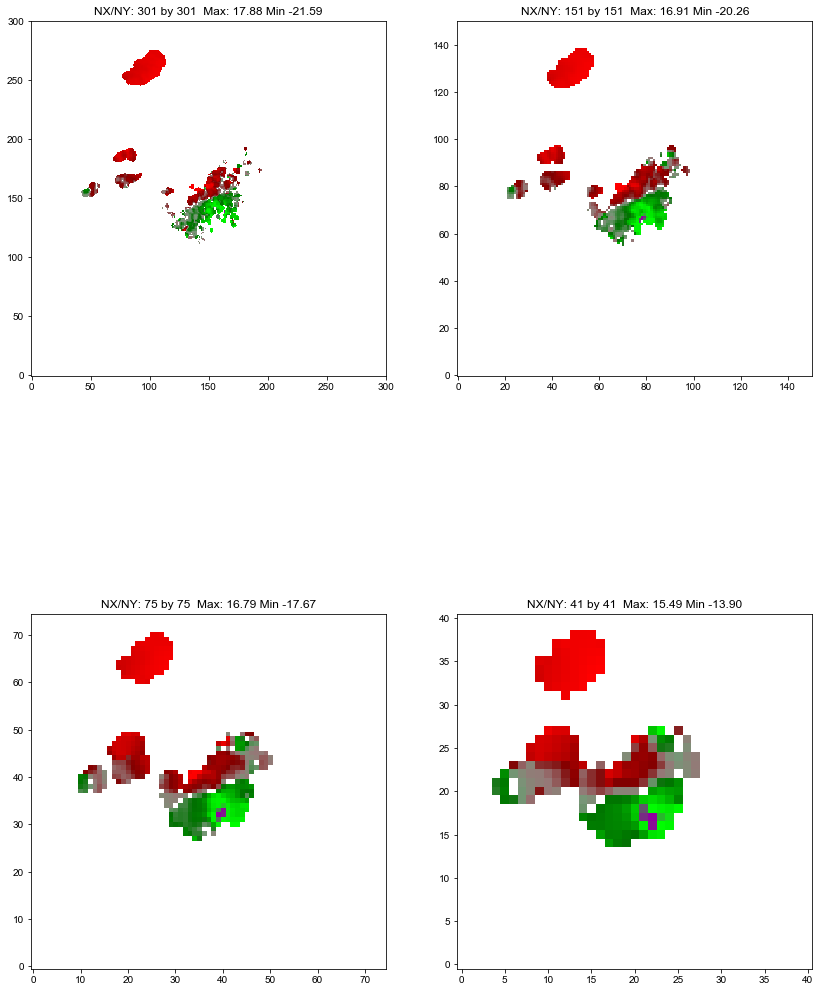

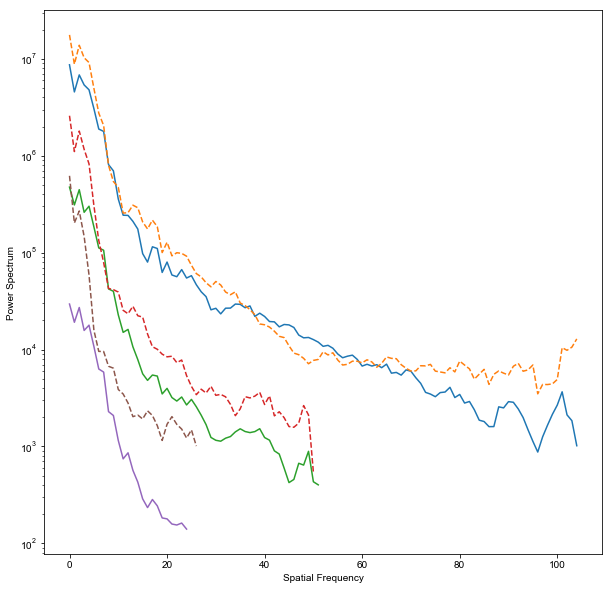

In [221]:
plt.figure(figsize = (14,20))

Csd1D = []

ax = plt.subplot(221)

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_1km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)

Csd1D.append(powerSpecturm(dd))


P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

ax   = plt.subplot(222)
im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_2km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)
Csd1D.append(powerSpecturm(dd))

P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

ax = plt.subplot(223)

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_4km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)
Csd1D.append(powerSpecturm(dd))

P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

ax = plt.subplot(224)

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_8km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)
Csd1D.append(powerSpecturm(dd))

P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

P.show()

P.figure(figsize = (10,10))
for n in np.arange(1,4):
    P.semilogy( psd1D[n] )
    P.semilogy( Csd1D[n], '----' )
P.xlabel('Spatial Frequency')
P.ylabel('Power Spectrum')
P.show()

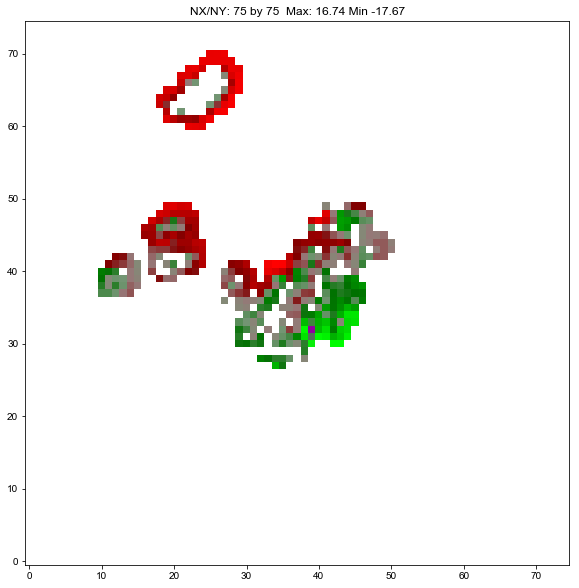

In [219]:
P.figure(figsize = (10,10))
im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_4km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0) - saveWave[1][0:-1,0:-1]

P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))
P.show()